##Import necessary packages and functions

##Three changes
1. Added Learning rate scheduler
2. increased batch size
3. increased number of epochs

In [0]:
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.callbacks import LearningRateScheduler
from keras.layers import BatchNormalization
from keras import optimizers
from keras.utils import np_utils

from keras.datasets import mnist

Using TensorFlow backend.


In [0]:
#loading the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


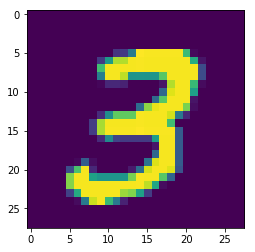

In [0]:
#plotting the sample data
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[7])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

#input shape (28, 28, 1) 
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())
#output shape (26, 26, 8), Receptive Field (3 X 3)

#input shape (26, 26, 8)
model.add(Convolution2D(32,3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
#output shape (24, 24, 32), Receptive Field (5 X 5)

#input shape (24, 24, 32)
model.add(Convolution2D(10,1,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
#output shape (24,24,10), Receptive Field (5 X 5)

#input shape (24, 24, 10)
model.add(MaxPooling2D(pool_size=(2,2)))
#output shape (12, 12, 32), Receptive Field (10 X 10)

#input shape (12, 12, 10)
model.add(Convolution2D(32,3,3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
#output shape (10, 10, 32), Receptive Field (12 X12)


#input shape (10, 10, 32)
model.add(Convolution2D(10,1,activation='relu'))
model.add(BatchNormalization())
#output shape (10,10,10), Receptive Field (12 X 12)

#input shape (10, 10, 10)
model.add(Convolution2D(16,3,3,activation='relu'))
model.add(BatchNormalization())
#output shape (8,8,16), Receptive Field (14 X 14)

#input shape (8, 8, 16)
model.add(Convolution2D(16,3,3, activation='relu'))
#model.add(BatchNormalization())
#output shape (6,6,16), Receptive Field (16 X 16)


model.add(Convolution2D(10,6))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        2336      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 10)        330       
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 10)        40        
__________

In [0]:
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)


In [0]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [0]:
model.fit(X_train, Y_train, batch_size=64, epochs=40, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 16s 261us/step - loss: 0.1599 - acc: 0.9486 - val_loss: 0.0580 - val_acc: 0.9815
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 11s 185us/step - loss: 0.0535 - acc: 0.9836 - val_loss: 0.0422 - val_acc: 0.9876
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 11s 185us/step - loss: 0.0420 - acc: 0.9864 - val_loss: 0.0368 - val_acc: 0.9886
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 11s 184us/step - loss: 0.0335 - acc: 0.9894 - val_loss: 0.0409 - val_acc: 0.9873
Epoch 5/40

Epoch 00005: LearningRateScheduler settin

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.028612293918085015, 0.9936]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[2.2574805e-18 1.4099862e-12 6.7999387e-12 7.4025286e-11 3.5482861e-14
  1.1587410e-17 1.8899019e-21 1.0000000e+00 8.2912125e-15 8.8986267e-09]
 [1.2346210e-07 3.5963146e-10 9.9999988e-01 6.1578927e-13 3.0104636e-12
  5.6839251e-19 1.6530770e-10 2.9373234e-16 6.0684131e-14 7.7278383e-17]
 [6.5417722e-15 1.0000000e+00 7.1558709e-16 9.5700529e-18 1.6530985e-11
  2.1959063e-14 1.9727662e-13 4.4954410e-10 1.9479569e-10 1.1663562e-12]
 [9.9999976e-01 2.1824622e-20 1.8033866e-11 3.8122860e-13 1.8722713e-13
  1.3132464e-12 2.2277200e-07 6.1101979e-15 7.3800514e-12 7.5521500e-09]
 [3.4622808e-16 4.9659804e-13 3.3526373e-15 2.0690634e-16 1.0000000e+00
  1.9598148e-18 7.0534301e-15 2.4803488e-12 2.2904652e-14 2.4828008e-08]
 [3.3560265e-15 9.9999952e-01 6.2994250e-13 1.4671609e-18 1.0607678e-09
  4.8979091e-17 2.7220291e-13 4.2236323e-07 5.2714022e-10 6.2998014e-12]
 [5.4048696e-25 1.4930149e-10 1.5335504e-15 5.5317873e-21 1.0000000e+00
  2.8966329e-15 4.5240279e-16 2.0455222e-10 1.3020351e-09 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

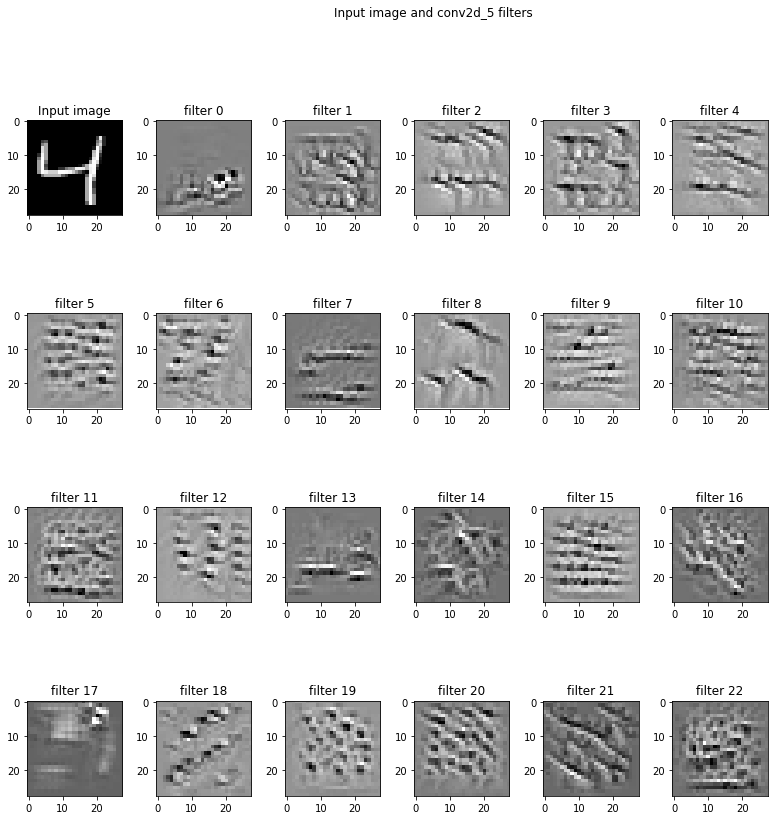

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_5'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

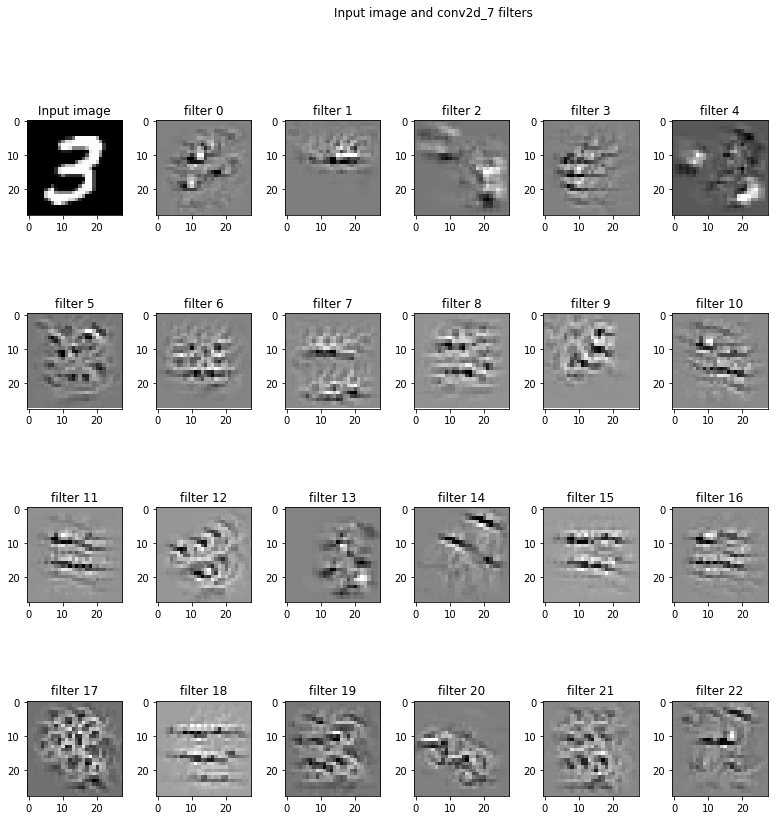

In [0]:
vis_img_in_filter(img = np.array(X_train[7]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_7')